In [2]:
from node_class_model import Model, train
import dgl
import torch
from dgl.data import CiteseerGraphDataset
from dgl.nn import GNNExplainer
import networkx as nx

In [3]:
data = CiteseerGraphDataset()
g = data[0]

  NumNodes: 3327
  NumEdges: 9228
  NumFeats: 3703
  NumClasses: 6
  NumTrainingSamples: 120
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


In [5]:
# features = g.ndata['feat']
# model = Model(features.shape[1], data.num_classes)
# train(model, g, epochs=300, printInterval=10, lr=0.001)
# torch.save(model, './models/CiteSeer_Trained_Model.pt')

In [6]:
model = torch.load('./models/CiteSeer_Trained_Model.pt')

In [20]:
def displaySG(nodeID):
    # Defines explainer model and trains model to explain node
    features = g.ndata['feat']
    explainer = GNNExplainer(model, num_hops=2, lr=0.001, num_epochs=150)
    new_center, sg, feat_mask, edge_mask = explainer.explain_node(nodeID, g, features)
    
    # Draws sub-graph
    nx_G = sg.to_networkx().to_undirected()
    # Create Node Color Map
    colors = ['azure', 'tan', 'wheat', 'lavender', 'lightskyblue', 'lightsalmon', 'lightgreen', 'thistle', 
              'slateblue', 'roseybrown', 'plum', 'peru', 'pink', 'palegreen', 'olive', 'moccasin', 'mintcream',
              'oldlace', 'linen', 'maroon', 'green', 'yellow', 'blue', 'orange', 'lightyellow', 'lightpink',
              'lavenderblush', 'ivory', 'purple', 'violet', 'lightgray', 'darkgreen', 'darkyellow', 'darkblue',
              'honeydue', 'darkpurple', 'darkorange', 'coral', 'hotpink', 'gainsboro']
    color_map = []
    for i, node in enumerate(nx_G):
        if node == new_center.numpy()[0]:
            color_map.append('gray')
        else:
            color_map.append(colors[sg.ndata['label'].numpy()[i]])
        
    # Draw Graph
    pos = nx.kamada_kawai_layout(nx_G)
    nx.draw_networkx(nx_G, pos, node_color=color_map, with_labels=True)
    print(colors[sg.ndata['label'].numpy()[new_center.numpy()[0]]])
    
    return max(feat_mask), edge_mask

Explain node {node_id}: 100%|████████████████| 150/150 [00:00<00:00, 358.36it/s]

lightskyblue


(tensor(0.6418),
 tensor([0.6211, 0.4716, 0.5941, 0.5846, 0.3156, 0.4714, 0.6058, 0.7005, 0.3517,
         0.4329, 0.2920, 0.3511, 0.6480, 0.6402, 0.7227, 0.6187, 0.6785, 0.3621,
         0.5028, 0.3221, 0.6609, 0.6066]))

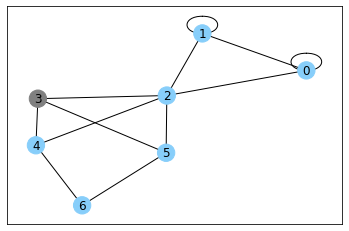

In [21]:
displaySG(7)